# Assignment 2 (10 Marks)

Please submit this file only.

Name:Gurraj Singh 

Student ID:190128350

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [5]:
import pandas as pd

df = pd.read_csv('energy-price.csv')

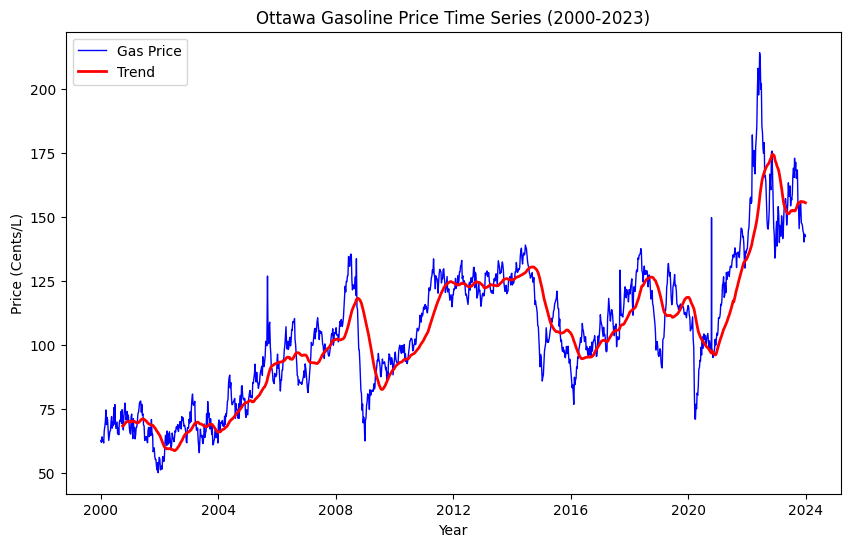

In [6]:
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

ottawa = df[(df["Fuel Type"] == 'Regular Unleaded Gasoline') & (df['Date'].dt.year<=2023) & (df['Date'].dt.year>=2000)][['Date','Ottawa']]
ottawa.sort_values('Date', inplace=True)
ottawa['smooth'] = ottawa["Ottawa"].rolling(window=40).mean()

plt.figure(figsize=(10,6))
plt.plot(ottawa['Date'],ottawa['Ottawa'],label = 'Gas Price', color = 'blue', linewidth = 1)
plt.plot(ottawa['Date'],ottawa['smooth'], label = 'Trend', color= 'red', linewidth = 2)
plt.title('Ottawa Gasoline Price Time Series (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Price (Cents/L)')
plt.legend()
plt.show()


## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [7]:
import pandas as pd
import geopandas 

## volcanoes in the world
volcano = pd.read_csv('volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
## earthquakes in Canada
earthquake = pd.read_csv('earthquake.txt',sep='|')

/var/folders/9v/xhjsczps1hjc_y8_bcj_cw140000gn/T/ipykernel_33176/1687320600.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


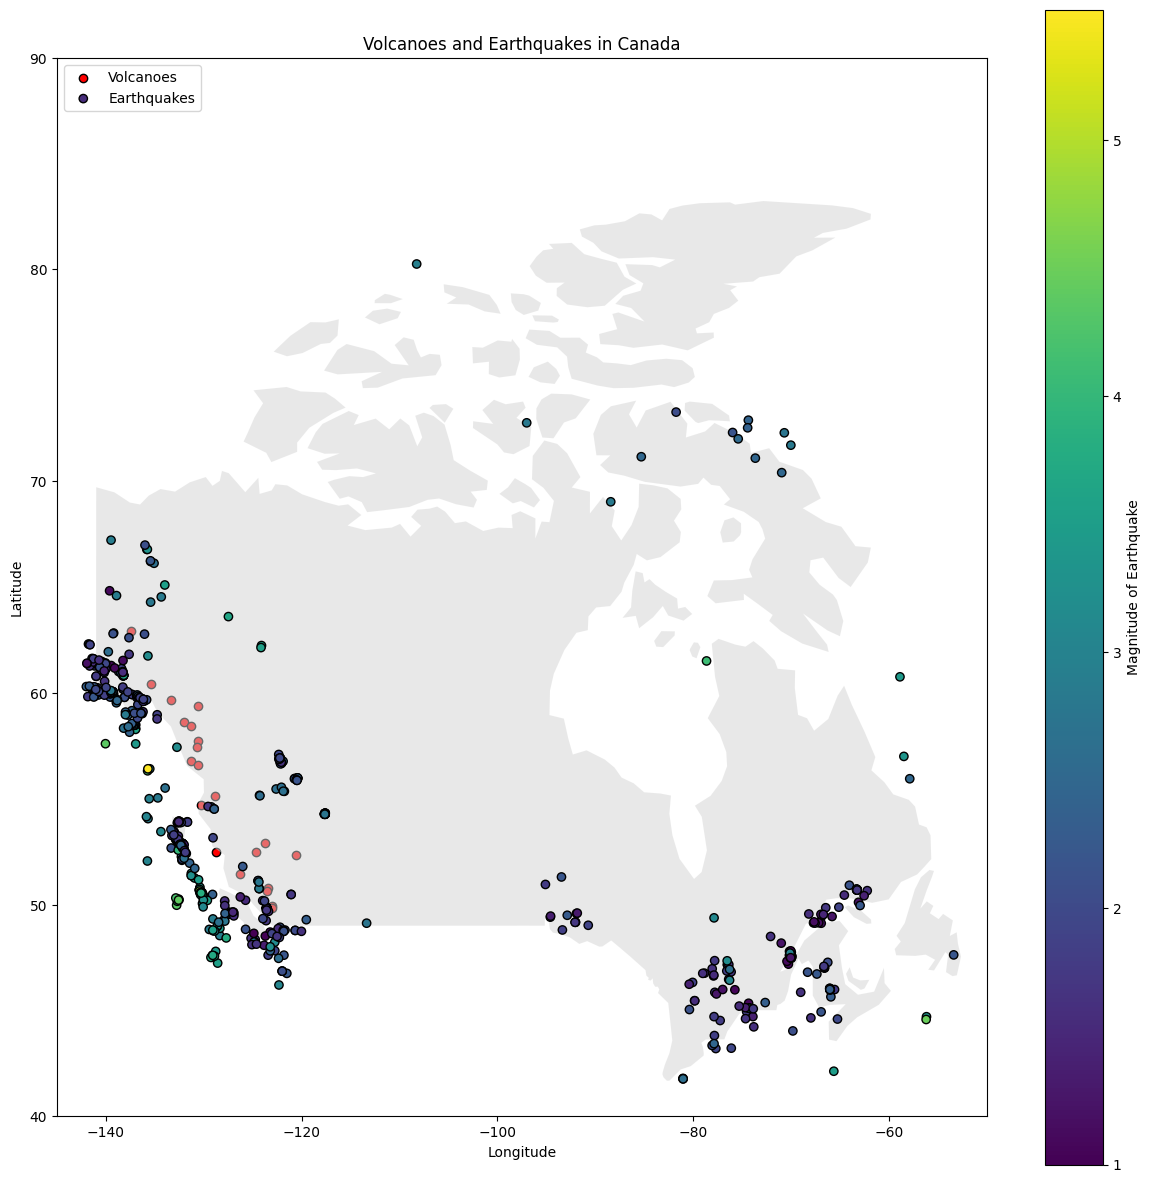

In [8]:
volcanoCanada = volcano[(volcano['Country'] == 'Canada')]
canada = world.loc[world['name'] == 'Canada']
fig, ax = plt.subplots(figsize=(15, 15))

ax.scatter(volcanoCanada['Longitude'], volcanoCanada['Latitude'], 
           color='red', label='Volcanoes', edgecolor='k')
canada.plot(ax=ax, color='lightgrey',alpha = 0.5)

earthquake_scatter = ax.scatter(earthquake['Longitude'], earthquake['Latitude'], 
                                 c=earthquake['Magnitude'], cmap='viridis', 
                                 label='Earthquakes', edgecolor='k')

cbar = fig.colorbar(earthquake_scatter, ax=ax)
cbar.set_label('Magnitude of Earthquake')

ax.set_title('Volcanoes and Earthquakes in Canada')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xlim([-145, -50])
ax.set_ylim([40, 90])

ax.legend(loc='upper left')
plt.show()